# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
base = pd.read_csv('previsao_de_renda.csv',sep=',')
base = base.drop('Unnamed: 0', axis=1)
base.dtypes
base['data_ref'] = pd.to_datetime(base['data_ref'])
base.head()
base.dtypes

data_ref                 datetime64[ns]
index                             int64
sexo                             object
posse_de_veiculo                   bool
posse_de_imovel                    bool
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
mau                                bool
renda                           float64
dtype: object

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

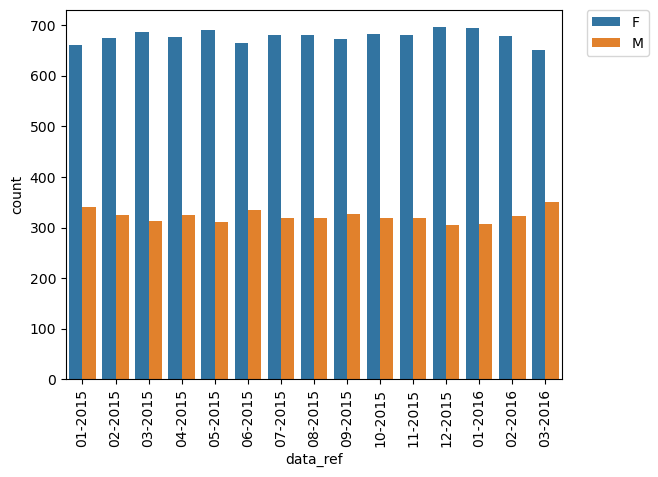

In [4]:
ax = sns.countplot(x='data_ref', hue='sexo', data=base)

ticks_lab = base['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks_lab

ticks = ax.set_xticks(list(range(base['data_ref'].nunique())))
labels = ax.set_xticklabels(ticks_lab, rotation = 90)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

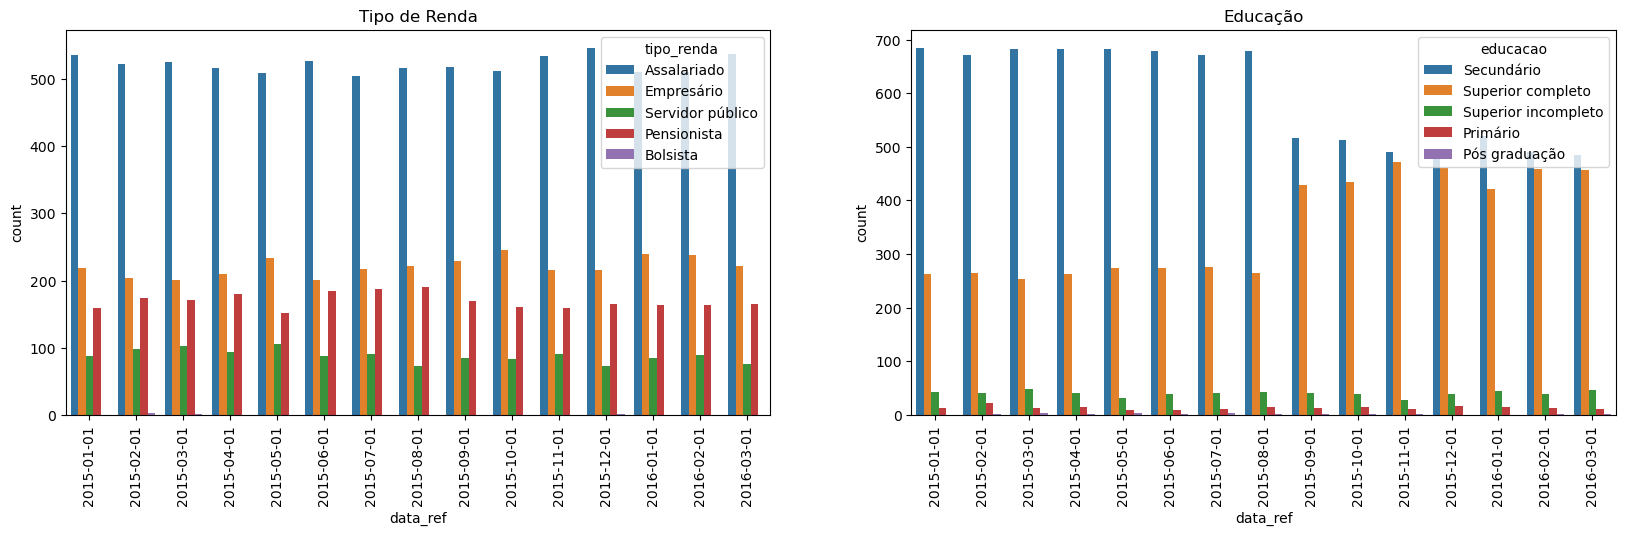

In [14]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='data_ref', hue='tipo_renda', data=base)
plt.title('Tipo de Renda')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='data_ref', hue='educacao', data=base)
plt.title('Educação')
plt.xticks(rotation=90)
plt.show()


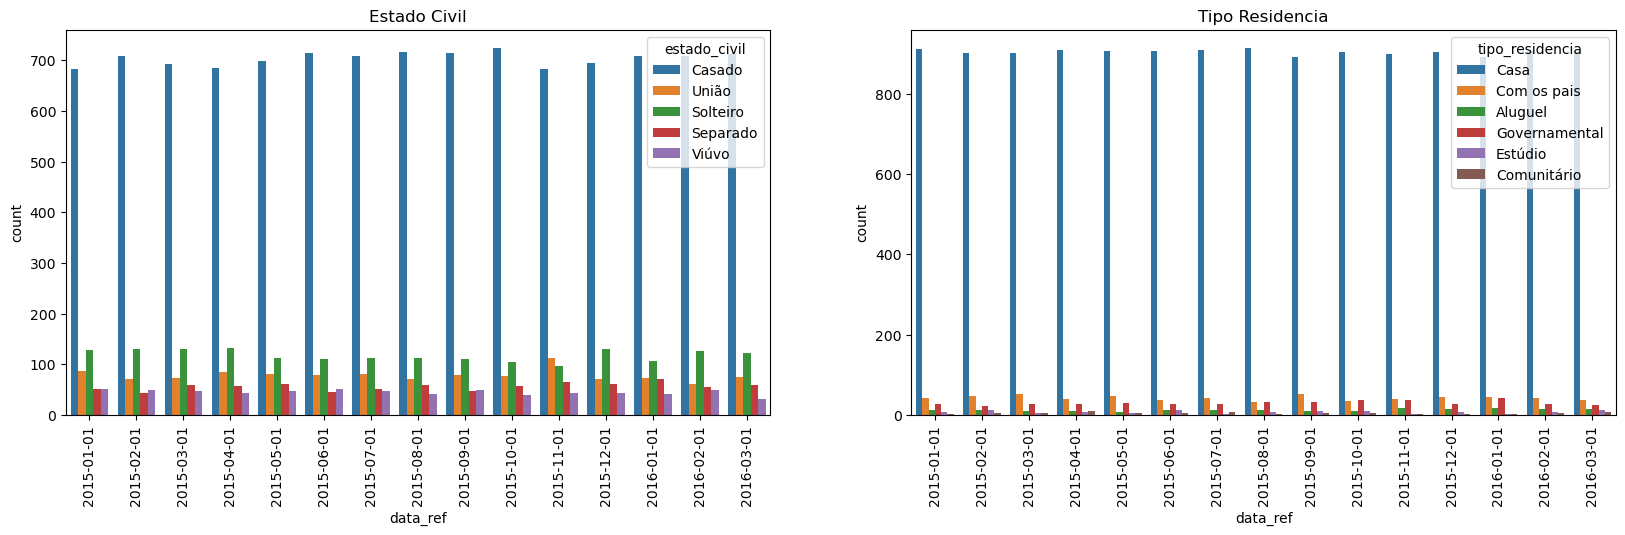

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(x='data_ref', hue='estado_civil', data=base)
plt.title('Estado Civil')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='data_ref', hue='tipo_residencia', data=base)
plt.title('Tipo Residencia')
plt.xticks(rotation=90)
plt.show()

De acordo com a análise das variáveis qualitativas, é notável uma mudança expresiva no conjunto de dados referente a educação, onde tem uma alteração a partir do mês de setembro

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

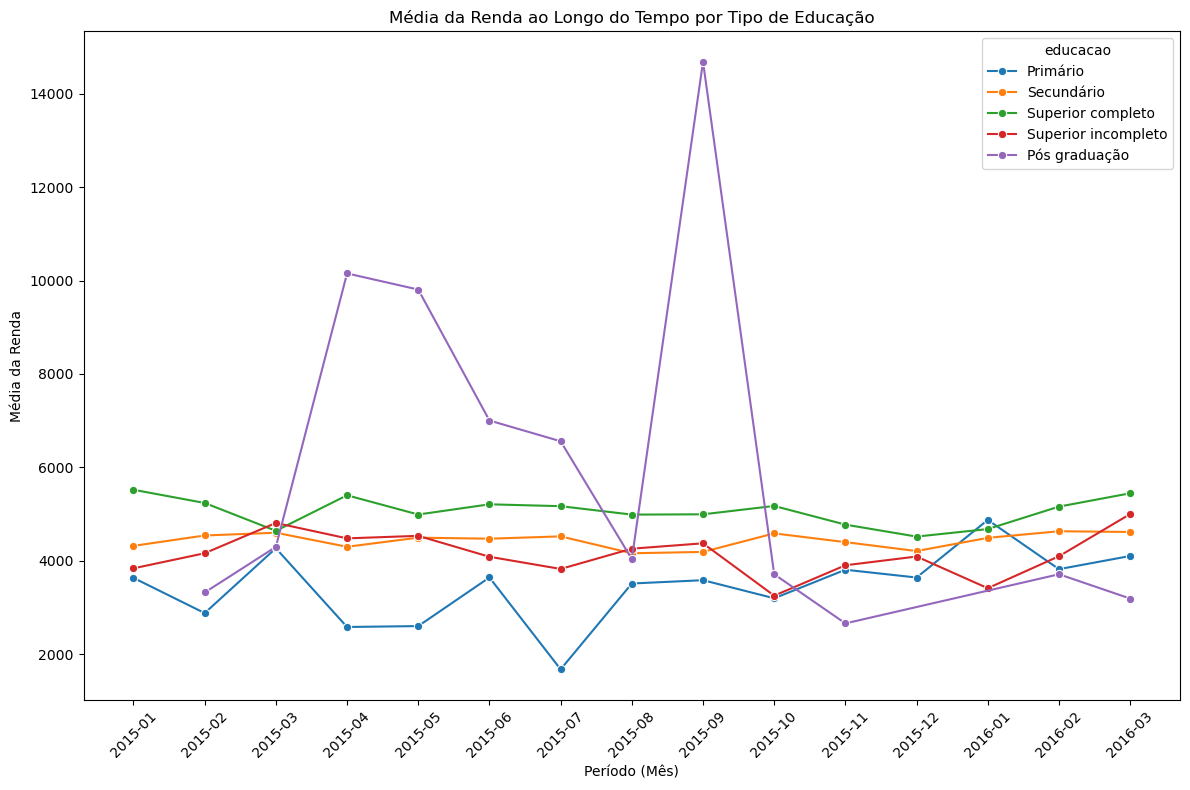

In [42]:
media_tipo_renda = base.groupby([base['data_ref'].dt.to_period('M'), 'educacao'])['renda'].mean().reset_index()
media_tipo_renda['data_ref'] = media_tipo_renda['data_ref'].astype(str)

plt.figure(figsize=(12,8))
sns.lineplot(data=media_tipo_renda, x='data_ref', y='renda', hue='educacao', marker = 'o')
plt.title("Média da Renda ao Longo do Tempo por Tipo de Educação")
plt.xlabel('Período (Mês)')
plt.ylabel('Média da Renda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


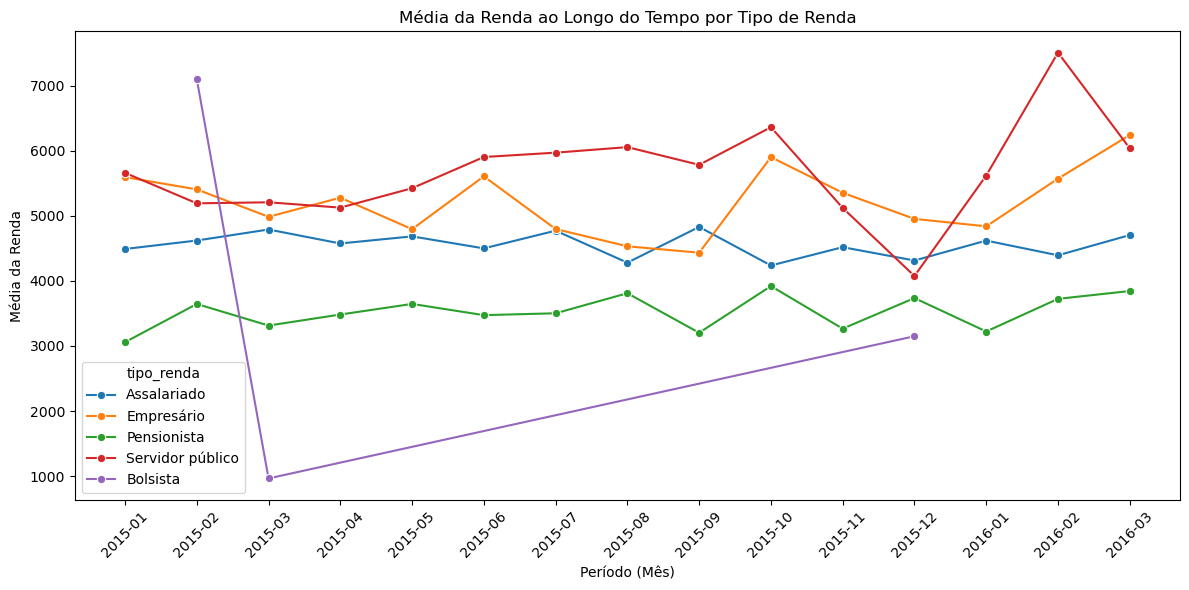

In [40]:
base_agrupada = base.groupby([base['data_ref'].dt.to_period('M'), 'tipo_renda'])['renda'].mean().reset_index()
base_agrupada['data_ref'] = base_agrupada['data_ref'].astype(str)

# Plotar o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=base_agrupada, x='data_ref', y='renda', hue='tipo_renda', marker='o')
plt.title('Média da Renda ao Longo do Tempo por Tipo de Renda')
plt.xlabel('Período (Mês)')
plt.ylabel('Média da Renda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

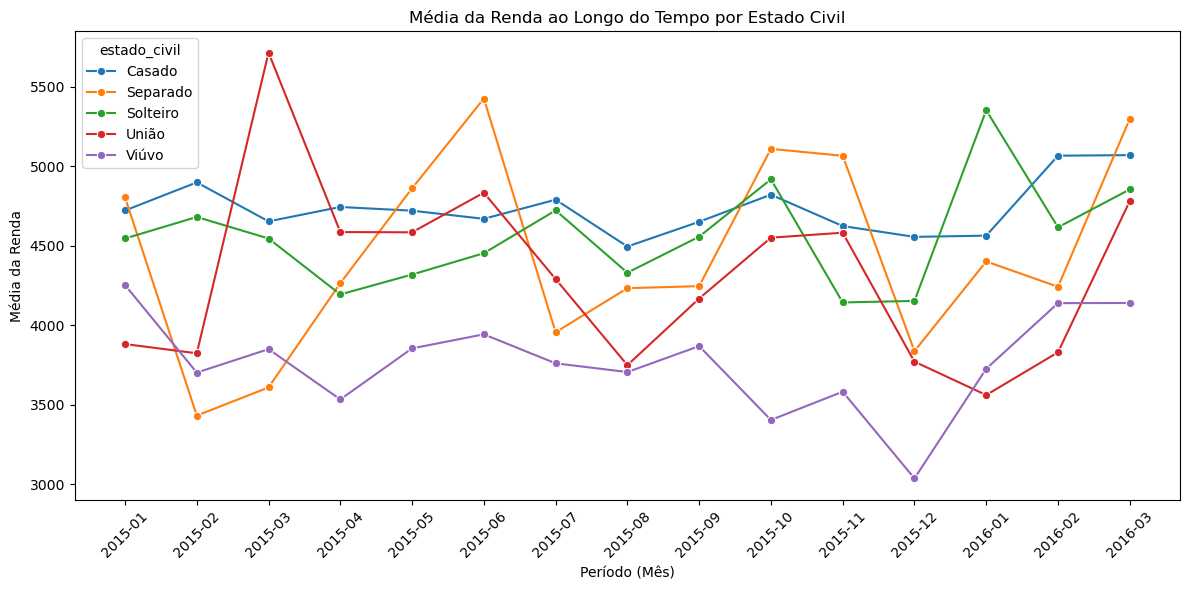

In [43]:
base_agrupada = base.groupby([base['data_ref'].dt.to_period('M'), 'estado_civil'])['renda'].mean().reset_index()
base_agrupada['data_ref'] = base_agrupada['data_ref'].astype(str)

# Plotar o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=base_agrupada, x='data_ref', y='renda', hue='estado_civil', marker='o')
plt.title('Média da Renda ao Longo do Tempo por Estado Civil')
plt.xlabel('Período (Mês)')
plt.ylabel('Média da Renda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

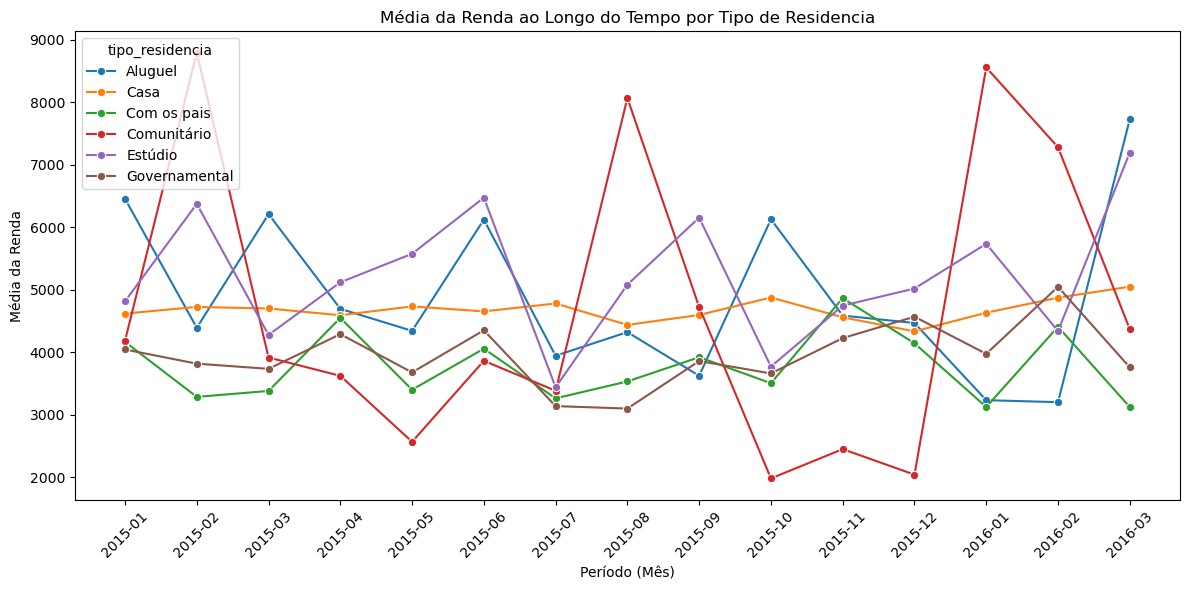

In [44]:
base_agrupada = base.groupby([base['data_ref'].dt.to_period('M'), 'tipo_residencia'])['renda'].mean().reset_index()
base_agrupada['data_ref'] = base_agrupada['data_ref'].astype(str)

# Plotar o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=base_agrupada, x='data_ref', y='renda', hue='tipo_residencia', marker='o')
plt.title('Média da Renda ao Longo do Tempo por Tipo de Residencia')
plt.xlabel('Período (Mês)')
plt.ylabel('Média da Renda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observando as médias de renda perante as váriaveis qualitativas, podemos observar que temos uma boa estabilidade nas variáveis educação e tipo de renda, já em tipo de residência e estado civil, as médias se movimentam muito irregularmente